# Lab 6: Support Vector Machines (SVM's)

## By Yuri Henrique Galvao - Student # 3151850

## Importing the necessary packages and modules

In [33]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import hinge_loss, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import r_regression, SelectKBest
from sklearn.preprocessing import StandardScaler

# Classification with SVM's

## Download the Iris dataset from sklearn

We will be using the ***Iris dataset*** from sklearn

In [2]:
iris_df =  load_iris(as_frame=True).frame
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
iris = load_iris()
X_original = iris.data
Y_original = iris.target
print(type(X_original))
print(type(Y_original))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
X_original.shape

(150, 4)

In [8]:
Y_original.shape

(150,)

# Prepare data for 2d experiments and plots

## Split your data into a training and test set using train_test_split from sklearn and set stratify=y

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X_original, Y_original, test_size=0.25, random_state=0, stratify=Y_original)

In [24]:
print(f'''Training examples target classes: 
{Y_train}''')

Training examples target classes: 
[1 0 0 1 2 2 1 0 1 0 0 1 0 2 0 1 1 1 1 2 2 1 0 2 2 2 2 1 1 2 2 2 1 0 0 2 2
 1 1 2 2 0 0 1 0 1 2 0 0 2 1 2 1 0 0 0 0 2 0 1 1 1 2 0 1 1 0 1 2 1 2 0 1 2
 2 1 2 0 1 0 0 2 1 2 0 0 0 0 0 1 2 2 2 0 2 0 2 0 1 1 1 1 0 2 2 0 1 1 0 2 2
 2]


In [25]:
print(f'''Testing examples target classes:
{Y_test}''')

Testing examples target classes:
[0 0 0 0 1 1 1 0 1 2 2 2 1 2 1 0 0 2 0 1 2 1 1 0 2 0 0 1 2 1 0 1 2 2 0 1 2
 2]


## You will be grabbing 2 features from the dataset (You can use any of the feature selection methods you learnt in class)
Hint: I used chi-square feature selection because it is easy, fast and gave the same results as recursive feature elimination in previous labs

### Feature selection
#### Pearsons correlation
##### Correlation matrix

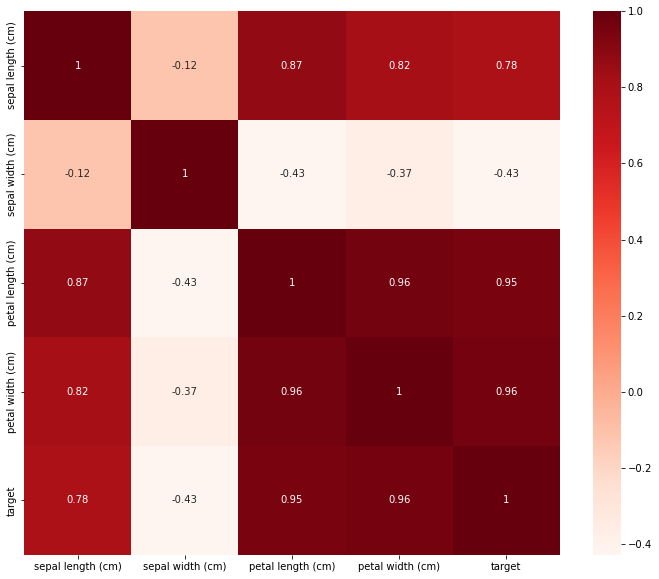

In [26]:
plt.figure(figsize=(12,10))
cor = iris_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [28]:
selector = SelectKBest(r_regression, k=2).fit(X_train, Y_train)

X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)

### Show which features were selected

In [30]:
cols

array([2, 3])

In [31]:
cols = selector.get_support(indices=True)
columns_names = [iris_df.columns[n] for n in cols]

In [32]:
## Let's show the names of the selected columns
print('These are the selected columns:\n')
for name in columns_names:
    print(name)

These are the selected columns:

petal length (cm)
petal width (cm)


## Use StandardScaler to feature scale your data (If you are using chi-squared, you will want to do this after you have selected your features)

In [35]:
scaler = StandardScaler()
scaler.fit(X_train_new)
X_train_fs = scaler.transform(X_train_new)
X_test_fs = scaler.transform(X_test_new)

In [36]:
X_train_fs

array([[-0.15148942, -0.27585067],
       [-1.32740725, -1.32760471],
       [-1.32740725, -1.32760471],
       [-0.26348159, -0.27585067],
       [ 0.40847146,  0.64443411],
       [ 0.6884519 ,  0.90737262],
       [ 0.35247537,  0.1185571 ],
       [-1.38340334, -1.19613545],
       [ 0.52046363, -0.01291216],
       [-1.21541508, -0.80172769],
       [-1.43939943, -1.32760471],
       [ 0.07249493, -0.14438141],
       [-1.32740725, -1.32760471],
       [ 0.74444798,  1.5647189 ],
       [-1.21541508, -1.0646662 ],
       [-0.09549333,  0.1185571 ],
       [ 0.74444798,  0.51296486],
       [ 0.35247537,  0.25002635],
       [ 0.29647928,  0.1185571 ],
       [ 1.02442842,  1.30178039],
       [ 1.64038538,  1.30178039],
       [-0.15148942, -0.27585067],
       [-1.27141116, -1.45907396],
       [ 0.63245581,  0.77590337],
       [ 1.64038538,  1.03884188],
       [ 0.57645972,  0.77590337],
       [ 1.30440886,  1.43324964],
       [ 0.12849102, -0.01291216],
       [ 0.29647928,

# Prepare data for 3d experiments and plots

## Grab the first 3 features in your datsset and change to binary classification problem 
- You will have to make the problem a binary classifiation problem
  - This will be done by grabbing Only labels with 0 or 1. We will be completely ignoring class 2

## Split the data into a training and testing dataset using train_test_split from sklearn and set stratify=y (In this case remember y is your binary version of y which has only 2 labels 0 and 1)

## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="linear", C=1.0

### Calculate the accuracy and hinge loss on the training set

### Calculate the accuracy and hinge loss on the testing set

### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors

## Train, predict and plot svm on 3d prepared data with the following configuration:

- kernel="linear", C=1.0

### Plot 3D graph using binary training data with hyperplane separating the 2 points
    - Hint: You should have the plane perfectly seperating 2 classes

### Get the accuracy and hinge loss of the testing set

## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="linear", C=100000

### Calculate the accuracy and hinge loss on the training set

### Calculate the accuracy and hinge loss on the testing set

### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors

## Train, predict and plot svm on 3d prepared data with the following configuration:

- kernel="linear", C=100000

### Plot 3D graph using binary training data with hyperplane separating the 2 points
    - Hint: You should have the plane perfectly seperating 2 classes

### Get the accuracy and hinge loss of the testing set

## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="linear", C=0.0001

### Calculate the accuracy and hinge loss on the training set

### Calculate the accuracy and hinge loss on the testing set

### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors

## Train, predict and plot svm on 3d prepared data with the following configuration:

- kernel="linear", C=0.0001

### Plot 3D graph using binary training data with hyperplane separating the 2 points
    - Hint: You will hot have a plane perfectly seperating the data because it is underfit

### Get the accuracy and hinge loss of the testing set

## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="poly", C=1.0, degree=2, coef0=0.0, gamma="scale"

### Calculate the accuracy and hinge loss on the training set

### Calculate the accuracy and hinge loss on the testing set

### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors

## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="poly", C=1.0, degree=3, coef0=0.0, gamma="scale"

### Calculate the accuracy and hinge loss on the training set

### Calculate the accuracy and hinge loss on the testing set

### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors

## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="rbf", C=1.0, gamma="scale"

### Calculate the accuracy and hinge loss on the training set

### Calculate the accuracy and hinge loss on the testing set

### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors